In [ ]:
library(repr) ; options(repr.plot.width = 5, repr.plot.height = 6) # Change plot sizes (in cm)

# Model Fitting using Maximum Likelihood

## Introduction

In this Chapter we learn about and work through various examples of model fitting to biological data using Maximum Likelihood. It is recommended that you see this introductory [lecture](https://github.com/MulQuaBio/MQB/tree/main/content/lectures/EnE_Modelling_Intro) on model fitting in Ecology and Evolution. 

[Previously](./NLLS.ipynb), we learned how to fit a mathematical model/equation to data by using the Least Squares method (linear or nonlinear). That is, we choose the parameters of model being fitted (e.g., straight line) to minimize the sum of the squares of the residuals/errors around the fitted model. 

An alternative to minimizing the sum of squared errors is to find parameters to the function such that the * likelihood * of the parameters, given the data and the model, is maximized. 

<!-- Please see the [lectures](https://github.com/vectorbite/VBiTraining2/tree/master/lectures) for the theoretical background to the following examples.
 -->

## Probability review

We will begin with a review of foundational probability theory.
<!-- 
Axioms. Common discrete and continuous random variables, probability mass and density functions, cumulative functions.

Expectation, variance, statistical moments, moment generating functions. 

Central limit theorem, Weak law of large numbers. 
 -->

<!-- #### Acknowledgements
This series of five notebooks are compiled by Tin-Yu Hui based on existing materials. Special thanks to Dan Reuman who used to teach this module a long time ago. Some examples are extracted from Mick Crawley's GLM course, where I had the pleasure to attend, both as a student and as a GTA. Any errors that remain are, of course, my sole responsibility. 
 -->

### The three axioms of probability

These axioms are the building blocks of modern theories of probability and statistics. 

1) For any event $A$ in a sample space $S$, $Pr(A)\geqslant 0$.

2) $Pr(S)=1$
   
3) For disjoint events $A_1, A_2, A_3, ...$, then $Pr(A_1\cup A_2\cup A_3\cup ...)=Pr(A_1)+Pr(A_2)+Pr(A_3)+...$

We assign a probability measure $Pr(A)$ to an event $A$. The first axiom states that probability is always non-negative. The smallest probability is zero (i.e. impossible). The second axiom states that the probability of the whole sample space is one. The sample space $S$ contains all possible outcomes for the given random experiment. This also specifies the upper bound for a probability. For the third axiom, the probability of the union of disjoint (i.e. non-overlapping) events equals the sum of their individual probabilities. Think of a Venn diagram. 

### Random variables
A random variable (r.v.) is a variable that takes on its value by chance. A r.v. can take on a set of possible values, each with an associated probability. To fully characterise a r.v. we need to know 1) all its possible outcomes, which form the domain or support of the r.v., and 2) the probability of getting each outcome. 

Example: Let $X$ be the outcome of a coin toss. Certainly, $X$ is random. There can only be two possible outcomes: head or tail. If the coin is fair, then $Pr(X=head)=Pr(X=tail)=0.5$. These statements jointly characterise the r.v. $X$. 

#### Discrete random variables
Some r.v. take a discrete collection of values. We call them discrete r.v.. An example of a discrete r.v. is the outcome from rolling a fair die. 

A probability *mass* function (pmf) for a discrete r.v. $X$ is a function that describes the relative probability that $X$ takes each of its possible values. In most textbooks, the pmf is written as $f(x)$ or $f_X(x)$. See #2. for more notations. 

##### Bernoulli random variable
A Bernoulli r.v. is the simplest r.v. with two outcomes: success (1) or failure (0). It has one parameter $p$, the probability of success, which is bounded between 0 and 1. If $X\sim Bernoulli(p)$ then it is obvious that $Pr(X=1)=p$ and $Pr(X=0)=1-p$. While these two equations technically summarise the probabilities, the pmf has an alternative expression: $f_X(x)=p^x(1-p)^{1-x}$. 

Note that $f_X(x)=0$ elsewhere (outside of the support), but this statement is often too trivial to be included. 

##### Binomial random variable
A binomial r.v. is the sum of $n$ independent and identically distributed (i.i.d.) Bernoulli r.v. hence it takes values on $\{0, 1, 2, ..., n\}$. It is a two-parameter r.v.: $p$ the probability of success, inherited from Bernoulli r.v., and $n$ the number of i.i.d. Bernoulli trials. If $X\sim binomial(n, p)$ then its pmf is
$$f_X(x)=C^n_{x}p^x(1-p)^{n-x}$$
where $C^n_{x}$ is the number of combinations when we choose $x$ objects from $n$. Order of selection does not matter here. 

##### Poisson random variable
A Poisson r.v. models the number of events occurring in a fixed interval of time. Since it is a count, its possible values are all non-negative integers $\{0, 1, 2, 3, ...\}$. While there are infinitely many possible outcomes it is still regarded as a discrete r.v.. 

Poisson has one parameter which is the rate of occurrance $\lambda>0$. If $X\sim Poisson(\lambda)$ then
$$f_X(x)=\frac{\lambda^{x}e^{-\lambda}}{x!}$$

If $X\sim binomial(n, p)$ with reasonably large $p$ and reasonably small $np$, then $X$ can be approximated by a Poisson r.v. with $\lambda=np$. That is, the number of rare events can be modelled by Poisson. 

####  Continuous random variables
Continuous r.v., in contrast, take a whole range of real-number values (think of tomorrow's temperature or allele frequencies). To accommodate continuous r.v.., a probability *density* function (pdf) is in place to describe the relative probability that the r.v. takes each value in the range of possible values. 

Recall: The range of possible values within non-zero probability is called the *support* of a r.v.. 

#####  Uniform random variable
A uniform r.v. is a continous r.v. with two parameters $a$ and $b$, which are the lower and upper bounds (support). If $X\sim U(a,b)$ then
$$f_X(x)=1/(b-a)$$
which looks like a horizontal line from $a$ to $b$. 

##### Exponential random variable
Exponential r.v. models the time between two successive events (remember Poisson r.v.?). Since it is a measure of time, it is continous with support $[0, \infty)$ (inclusive of 0, but always smaller than infinity). A one-parameter r.v. which shares the same rate paramter $\lambda$ with Poisson. If $X\sim Exponential(\lambda)$ then
$$f_X(x)=\lambda e^{-\lambda x}$$

#####  Normal random variable
Later, we will learn why normal is the most famous r.v. of all and why normal approximation usually holds even if we have limited knowledge of the underlying distribution. $X\sim N(\mu, \sigma^2)$, it takes values over the entire real number line, from negative to positive infinity, or $x \in \Re$. Although its bell-shaped pdf is widely known and aesthetically pleasing, its mathematical form is not as memorable: 
$$f_X(x)=\frac{1}{\sqrt{2\pi \sigma}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
It is a two-parameter r.v. with $\mu$ and $\sigma^2$ if you have not already realised. 

####  Some notations
Most textbooks use the function $f()$ to denote a pmf/pdf. Some may specify the r.v. of interest through the subscript, e.g. $f_X()$. Capital letters are understood to be used for r.v. . The use of subscripts is extremely helpful when multiple r.v. are involved, say, when mentioning $X$ and $Y$ and their associated $f_X(x)$ and $f_Y(y)$. The lowercase $x$ inside the round brackets indicates the value at which the pmf/pdf is evaluated. These small $x$ or $y$ are real numbers (not r.v.). Numbers are numbers, r.v. are r.v.. 

Some texts may even state the associated parameter(s) $\theta$ in the pmf/pdf, say, $f(x; \theta)$ or $f(x|\theta)$. The latter reads as "$x$ given $\theta$". 

####  Built-in statistical tables in R
We should always make good use of the built-in statistical functions in R. For example, there are <code>pnorm()</code>, <code>dnorm</code>, <code>qnorm()</code>, and <code>rnorm()</code> for normal distribution. The prefix <code>p</code> returns the cmf/cdf (see #3.2 below), <code>d</code> for the pmf/pdf, <code>q</code> for quantiles (for hypothesis testing), and <code>r</code> for random number generation. We will experiment some of these functions in today's practical. 

### Probability and cumulative functions
####  Properties of probability mass and density functions
Per discussed, pmf/pdf are functions to describe the relative probabilities of the outcomes and to characterise a r.v.. From the first axiom, probabilities are non-negative, hence the pmf/pdf never go below the horizontal axis. From the second axiom, we learnt that the sum of pmf bars must be one:
$$\sum_{all~possible~outcomes} f_X(x)=1$$
For continuous case, if we take the limit of summation (of vertical bars) it becomes integration: 
$$\int_{all~possible~outcomes} f_X(x)dx=1$$
That is, the *area* under a pdf must be one. 

####  Cumulative mass and density functions
We use capital $F()$ for cumulative functions (cmf/cdf). As its name suggests, $F_X(x)=Pr(X\leqslant x)$ by definition. It is a non-decreasing function with $F(-\infty)=0$ and $F(\infty)=1$. For discrete r.v., 
$$F_X(x)=\sum_{x_i\leqslant x}f_X(x_i)$$
For continuous case, $F_X(x)$ is the area under the pdf curve, from $-\infty$ to $x$: 
$$F_X(x)=\int_{-\infty}^{x}f_X(t)dt$$
I hope you still remember the fundamental theorem of calculus. Conversely, we can obtain pdf by differentiating cdf. You only need either the cumulative or probability function to characterise a r.v. 

### Statistical moments and expectation
####  Expectation
Imagine an experiment that can be repeated for *infinitely* many times. Imagine you keep tossing a coin or keep drawing random numbers from a given distribution for *infinitely* many times. The expecation is the "average" of the said experiment. 

Of course, this "average" is hypthetical one as nobody can afford having *infinitely* many repeats. Here we describe the "average" behaviour of a r.v. on the population level. Try not to confuse with the "sample average" that we tend to calculate from real data. In fact, today's discussion does not involve any data. We are merely discussing the characteristics of r.v. based on some given random mechanisms. 

For discrete r.v., 
$$E[X]=\sum_{all~possible~outcomes}xf(x)$$
For continuous r.v., 
$$E[X]=\int_{-\infty}^{+\infty}xf(x)dx$$
You can replace the bounds of the integral by the support of $X$. $E[X]$ is the expected value of $X$, the "average" value weighted according to the pmf/pdf. $E[X]$ is also called the population mean or true mean of the r.v. $X$. It is a measure of central tendency. 

####  Variance
Similarly, we have the population variance, which is given by
$$Var[X]=E[(X-E[X])^2]$$
The formula above suggests that variance is the expected distance squared of the r.v. $X$ from its population mean. In practice we tend to use this alternative form: 
$$Var[X]=E[X^2]-(E[X])^2$$
There is no surprise that variance is a measure of dispersion. 

####  Higher moments
In general, the $n^{th}$ *raw* moment of $X$ is $E[X^n]$: 
$$E[X^n]=\int x^nf(x)dx$$

And the $n^{th}$ central moment is $E[(X-E[X])^n]$. In most cases only the first few moments are studied. For example, the third moment of a r.v. describes its skewness (e.g., a normal r.v. has 0 skewness as a bell curve is symmetric about $\mu$), and the fourth moments is a measure of kurtosis (fat tails). 

Note that not all distributions have finite moments. One example is the Cauchy distribution (t-distribution with 1 degree of freedom) whose $E[X]$ is undefined. 

####  More on the expectation operator
We get a real number after taking the expectation from a r.v., we get a real number. Note that expectation is linear: 
$$E[aX+bY]=aE[X]+bE[Y]$$
for any r.v. $X$, $Y$ and any real numbers $a$, $b$. 

In some cases, we may be required to transform a r.v. or to calculate the expectation of a transformed r.v.: 
$$E[g(X)]=\int g(x)f(x)dx$$ for any real function $g$. 

Note that $g(X)$ itself is another r.v. with its own support, pdf/pmf, expecation, etc.. The same is true for $(X+Y)$, that is, the sum (or prodictof r.v. is another r.v.. Remember, transformation of a r.v. yields another r.v.. A r.v. will not suddenly turn into a real number. 

####  Moment generating function
A moment-generating function (mgf) is the third way to characterise an r.v.. $M_X(t)$ is a carefully crafted function from $X$ such that it "generates" statistical moments through its derivatives at $t=0$, note that $t$ is a dummy variable. The $n^th$ moment of $X$ is: 
$$E[X^n]=\frac{d^nM_X(t)}{dt^n}|_{t=0}$$

For keen readers, $M_X(t)=E[e^{tX}]$. 

### Central limit theorem and Weak law of large numbers
####  Central limit theorem
Let $\{X_1, X_2, X_3, ..., X_n\}$ be i.i.d. r.v. with finite $E[X_i]=\mu$ and finite $Var[X_i]=\sigma^2$. Also let $\bar{X_n}=(X_1+X_2+...+X_n)/n$ be the sample mean of these r.v. ($\bar{X_n}$ is another r.v.). The central limit theorem states that as $n\rightarrow \infty$, the r.v. $\sqrt{n}(\bar{X_n}-\mu)$ converges *in distribution* to a normal distribution: 
$$\sqrt{n}(\bar{X_n}-\mu) \xrightarrow{d} N(0,\sigma^2)$$

See today's practical for visualisation. 

####  Weak law of large numbers
Let us consider a similar series of i.i.d. r.v. $\{X_1, X_2, X_3, ..., X_n\}$ with finite $E[X_i]=\mu$. The weak law of large numbers states that the sample mean $\bar{X_n}$ converges *in probability* to the expected value when $n\rightarrow \infty$. That is, for any postive $\epsilon$, 
$$\lim_{n\rightarrow \infty}Pr(|\bar{X_n}-\mu|<\epsilon)=1$$

## Multivariate random variables, Likelihood functions

<!-- We will now learn about likelihood and log-likelihood functions, Point estimation, maximisation by hand, maximisation by computer, MLE coin-tossing example, i.i.d. normal example. 
 -->

### Multivariate random variables
Quite often multiple r.v. are considered simultaneously in a system due to their interaction. For example, population sizes of the species within a predator-prey system, allele frequencies among tightly linked loci, traits within an individual, and many more. It is essential for us to extend the discussions of r.v. and pmf/pdf to multivariate cases. 

#### Joint probability density functions
Given a pair of r.v. $X$ and $Y$, the joint pmf/pdf is $f_{X,Y}(x,y)$, a higher-dimensional function. In this bivariate case the joint pdf can be visualised in the form of a 3D plot. Following the same rules as the univeriate case, $f_{X,Y}(x,y)$ must be non-negative, and must integrate to one: 
$$\int\int f_{X,Y}(x,y)dxdy=1$$

##### Bivariate normal random variables
The support of a bivariate normal r.v. is the entire real number *plane*, or $\Re^2$. In univariate normal we have two parameters $\mu$ and $\sigma^2$ which are both numbers. In bivariate normal we have the multivariate analogy of the two, but this time they are called the mean vector $\boldsymbol{\mu}=\begin{pmatrix}\mu_X \\ \mu_Y \end{pmatrix}$ and variance-covariance matrix $\boldsymbol{\Sigma}=\begin{bmatrix}\sigma_X^2 & \rho \sigma_X \sigma_Y \\ \rho \sigma_X \sigma_Y & \sigma_Y^2 \end{bmatrix}$. 

The entries of $\boldsymbol{\mu}$ and $\boldsymbol{\Sigma}$ are numbers. For instance, here we have the individual means and variances for $X$ and $Y$, and also $\rho$ for the correlation between the two. Check the link below to visualise the joint pdf of a bivariate normal r.v.. 

http://socr.ucla.edu/htmls/HTML5/BivariateNormal/

In general, for a $k$-dimensional multivariate normal, the mean vector is of length $k$, and the variance-covariance matrix is a $k$-by-$k$ symmetric and (semi)-postive definite matrix. Note that many applications rely on the decomposition of $\boldsymbol{\Sigma}$, such as Principal component analysis. 

#### Marginal distributions
Sometimes we are interested in one r.v. without referencing to the values of another. In this case the focus on finding the marginal distribution of the r.v. of interest. In a bivariate case with r.v. $X$ and $Y$ and their joint pdf $f_{X,Y}(x,y)$, the marginal pdf of $X$ is 
$$f_X(x)=\int f_{X,Y}(x,y)dy$$
The integration along the $y$ axis is to marginalise out (get rid of) the uninterested r.v. $Y$. As a result, there will be no $y$ left in $f_X(x)$. Similarly, we can integrate along the other axis to find $f_Y(y)$. Note that the marginal pdf is indeed a pdf therefore the properties we discussed yesterday remain applicable. 

#### Conditional distributions
If the value of r.v. $Y$ is known (i.e. we know $Y=y$) then this may give additional information on another r.v. $X$. The distribution of interest here is the conditional distribution of $X$ given $Y$: 
$$f_{X|Y}(x|y)=\frac{f_{X,Y}(x,y)}{f_Y(y)}$$

We can imagine $f_{X|Y}(x|y)$ as a slice of the joint pdf at $Y=y$ after normalisation. Of course we can find the conditional of $Y|X$ from the joint and the marginal of $X$. The following relationship is established: 
$$f_{X|Y}(x|y)f_Y(y)=f_{X,Y}(x,y)=f_{Y|X}(y|x)f_X(x)$$
I hope some of you may notice that this is the Bayes' theorem. I trust that you will be exposed to the theorem and its applications next week hence I shall not go beyond this. The key here is learn how we can obtain one distribution from the others via the "joint = marginal x conditional" relationship. 

###. Expectation and covariance
We can calculate expectations from the joint, conditional, or marginal distributions as before. With multiple r.v. come with more rules. 

#### Law of total expectation
Given two r.v. $X$ and $Y$, 
$$E[Y]=E[E(Y|X)]$$
You first get the conditional expecation before taking another (outer) expectation to obtain the marginal expecation of $Y$. 

#### Law of total variance
$$Var[Y]=E[Var(Y|X)]+Var[E(Y|X)]$$
which can be easily derived from the law of total expectation above. This is also called the "Eve's formula". 

#### Covariance and corelation
Covariance measures the joint variability of a pair of r.v.. Given $X$ and $Y$, 
$$cov[X,Y]=E[XY]-E[X]E[Y]$$
where $E[XY]=\int \int xyf_{X,Y}(x,y)dxdy$. 

The correlation is the normalised measure describing the *linear* association between a pair of r.v.: 
$$corr[X,Y]=\frac{cov[X,Y]}{Var[X]Var[Y]}$$
which is always bounded between -1 and +1. Note that only linear association is captured by correlation. A pair of r.v. can have zero correlation but are perfectly "related" (e.g. they go around a circle). 

Yesterday we mentioned that expectation is linear, that is, $E[X+Y]=E[X]+E[Y]$. This is true regardless of their correlation. The same cannot be said for variance:
$$Var[aX+bY]=a^2Var[X]+b^2Var[Y]+2abcov[X,Y]$$
for some real numbers $a$ and $b$. 

###. Independence
Independence is the strongest assumption in statistics as there is no way to test for it in real world. How can one confirm the toss of the first coin has nothing to do with the second? How can one be so certain that my action here will have zero influence to that by another person 1000 km away? Two events are independent if the occurrence of one does not affect the occurrence of another. 

If $X$ and $Y$ are independent then $corr[X,Y]=0$, but the reverse in not always true. In general $corr[X,Y]=0$ does not imply independence expect for some known cases (e.g. in multivariate normal). In fact, the assumption of independence is so strong that it guarantees $corr[g(x), h(y)]=0$ for all real functions $g$ and $h$ you can possibly imagine. 

#### Joint probability density functions under independence
$X$ and $Y$ are independent if and only if their joint pdf is the product of their marginals: 
$$f_{X,Y}(x,y)=f_X(x)f_Y(y)$$

### Interval
So far we have been discussing the properties of r.v., calculating probabilities and expectations etc. based on some given assumptions and fixed parameter value. A typical question would involve calculating the probability that 0, 1, 2 buses will arrive in the next unit of time. For example, if we assume the arrival of buses $X$ follow a Poisson distribution with $\lambda=3$, then
$$f_X(x, \lambda=3)=\frac{\lambda^xe^{-\lambda}}{x!}=\frac{3^xe^{-3}}{x!}$$
is a function of $x$ and a valid pmf. With known $/lambda$, we can calculate those probabilities by substituting $x=0$, $x=1$, and so on:

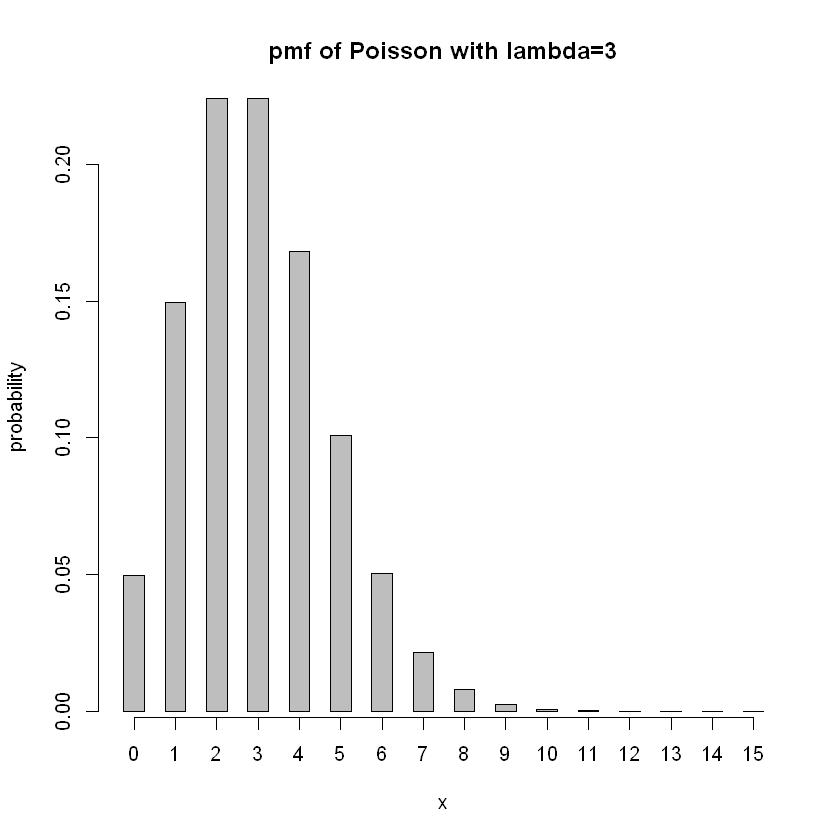

In [1]:
probability<-dpois(0:15, lambda=3)
barplot(probability, space=1, beside=F, xlab='x', ylab='probability', main='pmf of Poisson with lambda=3')
axis(1, at=seq(1, 31, 2)+0.5, labels=0:15)

From the pmf plot we know that $Pr(X=0)=0.0497$ and $Pr(X=1)=0.149$, and so on. Thur far there is no observation. We are still working out the probabilities of some potential outcomes inside our brain. We are still waiting for our bus. 

Now, the tide has turned that we actually have some data! Say we observed 3 buses within a unit time. This time we have $x=3$, but $\lambda$ is unknown. From the same Poisson "function", 
$$f_X(x=3, \lambda)=\frac{\lambda^xe^{-\lambda}}{x!}=\frac{\lambda^3e^{-\lambda}}{3!}$$
it becomes a function of $\lambda$ once the data is observed. One can plot this $f_X(x=3, \lambda)$ against $\lambda$, it is no longer a pmf (previously we plot it against $x$). By doing that, we are asking "what is the proability of seeing 3 buses if $\lambda=1$?", and what if $\lambda=1.5$? And so on. 

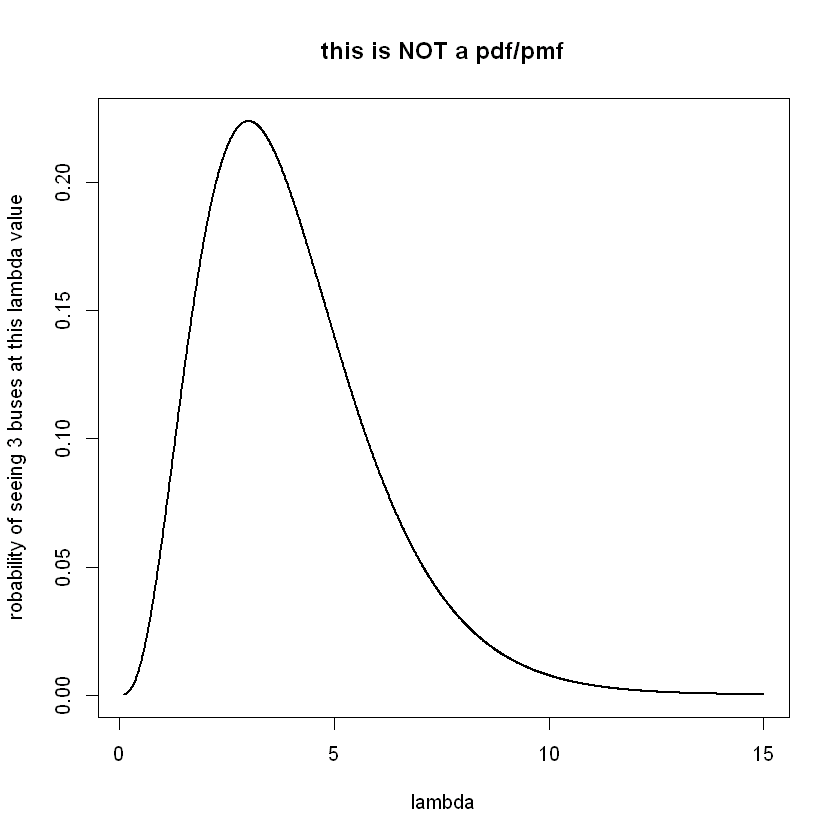

In [2]:
plot(seq(0.1, 15, 0.01), dpois(3, lambda=seq(0.1, 15, 0.01)), type='l', lwd=2, 
     xlab='lambda', ylab='robability of seeing 3 buses at this lambda value', main='this is NOT a pdf/pmf')

Essentially we are making inference on the unknown parameter from our observation. In the remaining sections of this notebook, we will formally introduce the likelihood framework for statistical inference. Welcome to the world of Statistics. 

###. Maximum Likelihood Estimation
Many said Maximum Likelihood Estimation (MLE) was invented by Sir Ronald Fisher, but I (as a statistician and geneticist many degrees inferior to Fisher) argue that such idea needs no invention but rather has been embedded in everybody's mind since the beginning of civilisation. I sincerely hope that by the end of this week you will appreciate MLE as a collection of methods who share a common belief towards how the "best parameters" should behave. 

A distribution of a r.v., or a statistical model comes with parameters. When a *dataset* is collected, and a statistical *model* is proposed, MLE provides a set of rules to find the best estimates of the associated *parameters*. In words, MLE aims to find the parameter values that make the observed dataset most "probable". 

The triplets: data, model, parameters. 

#### Likelihood function
To quantify how "probable" a paramter value is in producing our observed data we introduce the likelihood function $L(\underline{\theta})$. From now on we use $\underline{\theta}$ to denote a vector of parameters simply for generalisation (and similarly $\underline{x}$ for a vector of data). 

By definition, the likelihood function is the joint density (pdf) of our observation $\underline{x}$:
$$L(\underline{\theta})=L(\underline{\theta}|\underline{x})=f(\underline{x}|\underline{\theta})=f(x_1, x_2, ..., x_n|\underline{\theta})$$

Once $\underline{x}$ is observed, you may imagine that $\underline{x}$ turn into real numbers, and $L(\underline{\theta}|\underline{x})$ is a function of $\underline{\theta}$ only. We can evaluate $L(\underline{\theta}|\underline{x})$ along $\underline{\theta}$, and find a $\underline{\hat{\theta}}$ that maximises the function $L(\underline{\theta}|\underline{x})$. This is the spirit of MLE. 

#### Independent observations and log-likelihood
The likelihood function is the joint pdf of our observations. If they are independent, then the joint pdf becomes the product of univariate pdfs: 
$$L(\underline{\theta}|\underline{x})=f(x_1, x_2, ..., x_n|\underline{\theta})$$
$$=f_{X_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x_n)$$
which streamlines the construction of the likelihood function. 

Besides, many prefers to work on the log-likelihood function $l(\underline{\theta}|\underline{x})=\ln(L(\underline{\theta}|\underline{x}))$, as the product of pdfs immediately becomes the sum of log-pdfs. Both likelihood and log-likelihood functions attain their maximums at the same $\underline{\hat{\theta}}$, because log is a monotonoic monotonic (also non-decreasing) function. 

In MLE, we treat parameters as fixed but unknown quantities to be estimated. We are inferring parameters, not the probability of hitting a particular outcome. The likelihood function is not a pdf hence does not integrate to one. It is a function of the parameters. 

#### Coin tossing example (in R)
Assume we obtain $y$ heads from $n$ independent tosses. By definition, the likelihood function is the joint pmf of these $n$ tosses, which looks like a binomial distribution: 
$$L(p|y)=C_y^np^y(1-p)^{n-y}$$

After the experiment we observed 7 heads from 10 tosses. Let us put $y=7$ and $n=3$ into the likelihood function:
$$L(p)=C^{10}_7p^7(1-p)^3$$
We can rewrite this function in R. I cannot stress enough that the likelihood is a function of the parameter, as seen from <code><-function(p)</code>. We then plot the likelihood function against a range of values of $p$. Pay attention to the parameter space: $p$ is from Bernoulli hence it has to be bounded between 0 and 1. The second plot shows the log-likelihood function. 

[1] 8.748e-06

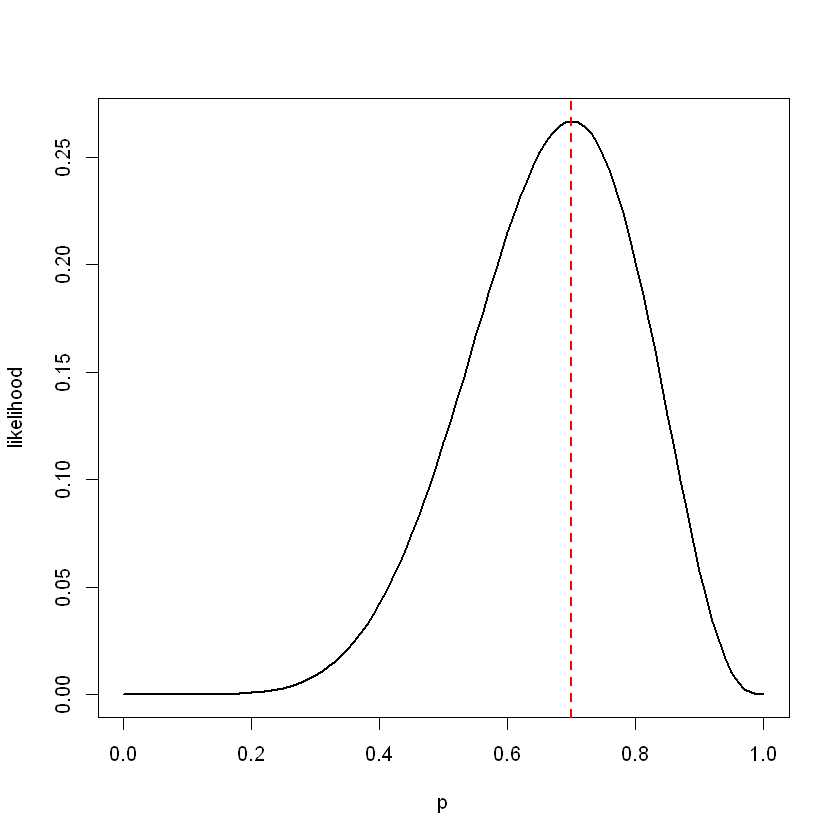

In [3]:
# WRITE DOWN THE LIKELIHOOD FUNCTION
binomial.likelihood<-function(p){
choose(10,7)*p^7*(1-p)^3
}
# LET US CALCULATE THE LIKELIHOOD VALUE AT p=0.1
binomial.likelihood(p=0.1)
# YOU GOT SOMETHING AROUND 8.748e-06, RIGHT?
# PLOT THE LIKELIHOOD FUNCTION FOR A RANGE OF p
p<-seq(0, 1, 0.01)
likelihood.values<-binomial.likelihood(p)
plot(p, likelihood.values, ylab='likelihood', type='l', lwd=2)
abline(v=0.7, col='red', lty=2, lwd=2)

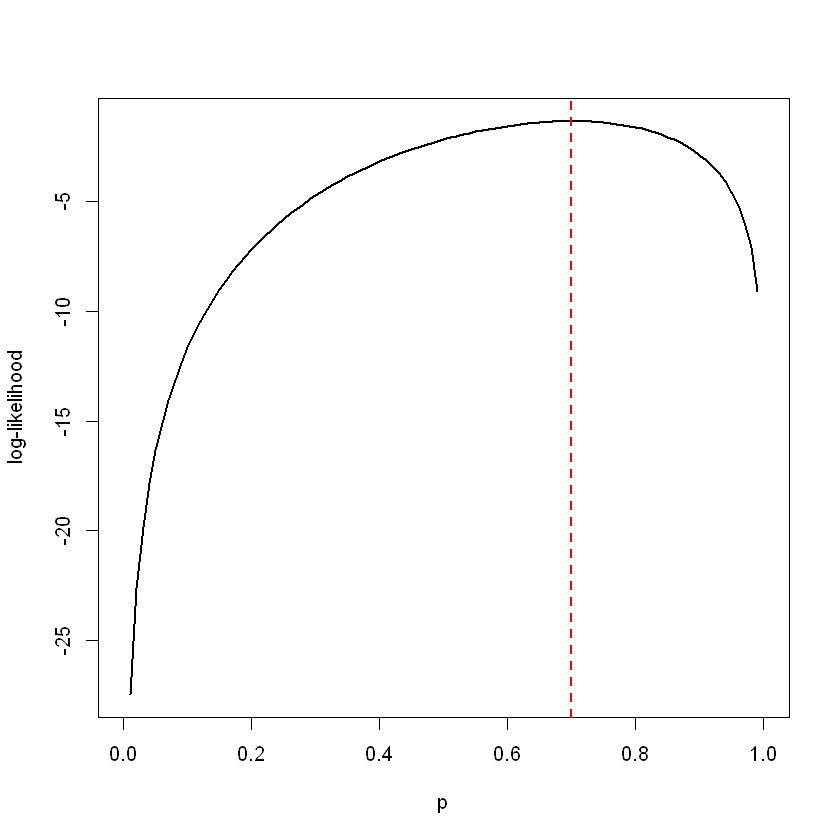

In [4]:
# LOG-LIKELIHOOD FUNCTION
log.binomial.likelihood<-function(p){
log(binomial.likelihood(p=p))
}
# PLOT THE LOG-LIKELIHOOD
p<-seq(0, 1, 0.01)
log.likelihood.values<-log.binomial.likelihood(p)
plot(p, log.likelihood.values, ylab='log-likelihood', type='l', lwd=2)
abline(v=0.7, col='red', lty=2, lwd=2)

The next step is to find value of $p$ such that $L(p)$ is maximised. It appears that the peak is at 0.7, and we say $\hat{p}=0.7$ is our maximum likelihood estimate. 

Beyond eyeballing, we can use R's optimisation routines to find the maixmum/minimum of a function. For univariate (one-parameter) case, we can use <code>optimize()</code>:

In [5]:
optimize(binomial.likelihood, interval=c(0,1), maximum=TRUE)

$maximum
[1] 0.6999843

$objective
[1] 0.2668279

<code>\$optimize()</code> returns the parameter value at which the function attains its maximum, where the <code>\$objective</code> is the maximised function value. 

#### Coin tossing example (by hand)
For a more general case with $y$ heads from $n$ independent tosses the likelihood function is:
$$L(p)=C_y^np^y(1-p)^{n-y}$$
To maximise a function means to find the first derivative, then find the point with zero slope. Of course there are other conditions to meet (e.g. the second derivative) for the global maximum. Here, let us work on the log-likelihood:
$$l(p)=\ln(L(p))=\ln(C_y^n)+y\ln(p)+(n-y)\ln(1-p)$$
Next, we differentiate $l(p)$ *with respect to $p$*. Note that the first term $\ln(C_y^n)$ does not contain $p$ thus is treated as a constant:
$$l'(p)=0+y\frac{1}{p}+(n-y)\frac{-1}{1-p}$$
Next, we find a $\hat{p}$ such that $l'(\hat{p})=0$:
$$\hat{p}=\frac{y}{n}$$
and we say this is the MLE for the (fixed but unknown) parameter $p$. 

#### i.i.d. Normal samples with unknown $\mu$
Suppose we have $X_1, X_2, ..., X_n$ i.i.d. samples from $N(\mu, 1)$. Variance is known but $\mu$ is the parameter to be estimated. By definition, the likelihood is a function of $\mu$, and is the joint pdf of our samples:
$$L(\mu)=f(x_1, x_2, ..., x_n)$$
Here $f$ is a joint (higher-dimensional) pdf. As these samples are independent, the joint pdf becomes the product of individual pdfs:
$$L(\mu)=f_{X_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x_n)$$
Note that $f_{X_i}$ are individual (one-dimensional) pdfs. Next, we make use of the fact that they are i.i.d. normal: 
$$L(\mu)=\prod_{i=1}^n\frac{1}{\sqrt{2\pi}}e^{\frac{(x_i-\mu)^2}{2}})$$
$$=(\frac{1}{\sqrt{2\pi}})^ne^{\frac{1}{2}\sum_{i=1}^n(x_i-\mu)^2}$$
The log-likelihood function is:
$$l(\mu)=constant-\frac{1}{2}\sum_{i=1}^n(x_i-\mu)^2$$
Next, differentiate it w.r.t. $\mu$:
$$l'(\mu)=0-\frac{1}{2}[-2\sum_{i=1}^n(x_i-\mu)]$$
Find a value of $\hat{\mu}$ such that $l'(\hat{\mu})=0$. That is to solve the following equation:
$$\sum_{i=1}^n(x_i-\hat{\mu})=0$$
Rearranging the terms gives:
$$\hat{\mu}=\frac{\sum_{i=1}^nx_i}{n}$$
And this is our MLE. 

#### i.i.d. Normal samples unknown $\mu$ and $\sigma^2$
With unknown $\sigma^2$ the formulation of the log-likelihood function is the same as in the previous example but it is now a bivariate (two-paramter) function $l(\mu, \sigma^2)$. Because of this, the *partial* derivavtives $\frac{\partial l}{\partial\mu}$ and $\frac{\partial l}{\partial\sigma^2}$ need to be evaluated. A partial derivative is the derivative of a multivariate function with respect to one of the variables while treating the others as constant. At last, we need to find a pair of $(\hat{\mu}, \hat{\sigma^2})$ such that the partial derivatives are zero simultaneously. Again pay attention to the parameter space: $\mu$ can be any real number, but $\sigma^2$ (or $\sigma$ itself) must be non-negative. I leave this as an exercise. 

## Theoretical guarantees

<!-- More MLE examples: linear regression, general linearised regression (logistic and Poisson). 

Using <code>optim()</code>. 

Properties of ML estimators: asymptotically unbiased, asymptotically efficient, consistent, asymptotically normal, invariance. 
 -->

### More MLE examples

#### Linear regression
I hope we are all familiar with the simplest form of a linear regression. It comprises a vector of response $\underline{x}$ and a vector of independent (or explanatory) variable $\underline{x}$: 
$$y_i=a+bx_i+\epsilon_i$$
where $a$ is the intercept and $b$ is the slope. $i=1, 2, ..., n$. $\epsilon_i$ is the error term, and in simple linear regression, $\epsilon_i$ are assumed to be i.i.d. $N(0,\sigma^2)$. 

Now we have identified the triplets required for parameter estimation: Our data $\underline{x}$ and $\underline{y}$. The three parameters of interest: $a$, $b$, and $\sigma^2$. And finally the model, which is i.i.d. normal errors. If we rearrange the regression equation such that the error is the subject:
$$\epsilon_i=y_i-a-bx_i$$
Then the likelihood becomes
$$L(\underline{\theta})=f(\epsilon_1\epsilon_2...\epsilon_n)=\prod_{i=1}^nf(\epsilon_i)$$
The first $f$ is the joint density of all the error terms, and the second $f$ is the pdf of an individual error (which is normally distributed with a common variance). Now the problem has reverted back to the one we saw in #4.6 yesterday, that we need to find a set of $(\hat{a}, \hat{b}, \hat{\sigma^2})$ such that the likelihood is maximised. I probably would delegate this task to R, see today's practical on <code>recapture.csv</code>, also available in a separate notebook. In R, we can use the built-in <code>dnorm(y-a-b*x, mean=0, sd=sigma)</code> instead of writing the normal pdf explicitly. 

#### Logistic regression
Logistic regression belongs to the family of generalised linear models (GLM). It aims to relate a binary response to a set of explanatory variable(s). For example, in public health a typical binary response will be the state of the patients (dead/alive), or whether a parasite is absent or present in one's body. When I think of a binary variable, I immediately recall the Bernoulli r.v., whose outcome is either 0 or 1. In fact, logistic regression assumes that each binary outcome is a Bernoulli r.v. with its own $p_i$:
$$Y_i\sim Bernoulli(p_i)$$
$i=1, 2, ..., n$. In addition, $p_i$ is influenced by the explanatory variable $x_i$. As a result, some will have a higher probability of success, depending on its relationship with $x_i$. Here I suggest the following form:
$$p_i=\eta^{-1}(a+bx_i)$$
$a$ and $b$ are the coefficients, similar to the intercept and slope in linear regression. $(a+bx_i)$ is called the linear predictor. The remaining question is, what is $\eta^{-1}$? 
$$\eta^{-1}=\frac{e^{a+bx_i}}{1+e^{a+bx_i}}$$
We know from the Bernoulli r.v. that $p_i$ has to be bounded between 0 and 1, but $(a+bx_i)$ can be any real number (linear). That is why we call upon $\eta^{-1}$ to map a real number to $[0, 1]$. $\eta^{-1}$ is called the *expit* transformation, and its inverse $\eta$ is *logit*, hence the name of the model. 

With the triplets identified we can proceed to find the ML estimates for $a$ and $b$. See <code>flowering.txt</code>, also available in a separate notebook. 

#### Poisson regression
Poisson regression is another GLM which is often used when the response are counts (e.g. number of mutations/crossovers). As its name suggests, it assumes each response follows a Poisson distribution with its own rate parameter $\lambda_i$:
$$Y_i\sim Poisson(\lambda_i)$$
$i=1, 2, ..., n$. Similar to the logistic case, we need a function to link up $\lambda_i$ with the linear predictor. The constraint here is that $\lambda_i$ must be non-negative due to it being a rate. An appropriate function will be exponential: 
$$\lambda_i=e^{a+bx_i}$$
Note that the inverse of exponential is log. 

In GLM, a link function provides the relationship between the lienar predictor and the mean of the distribution function. Logit and log are link functions in logistic and Poisson GLMs, respectively. I hope these examples help demystify GLMs and their model fitting via <code>glm(y~x, family=)</code>. 

###. <code>optim()</code>
<code>optim()</code> is a generic optimisation routines for multivariate functions, similar to what <code>optimize()</code> does in univariate case. Here multivariate refers to the number of parameters rather than observations. It is a so powerful that its help file <code>?optim</code> provides more questions than answers. 

#### Inputs
It takes quite a few arguments, usually in the following order:
1) The mandatory <code>par=</code> vector specifies the initial condition for the search. If it is a $k$-dimensional function then a vector of length $k$ should be supplied. Avoid starting near the boundary of the parameter space. 
2) Put the function name you wish to optimise under <code>fn=</code>. Mandatory.
3) <code>method=</code> instructs the optimisation algorithm to be used. The default is Nelder-Mead. The choice of algorithm can affect performance and numerical results. Another population option is <code>method='L-BFGS-B'</code> which takes a box-like constraint (see below).
4) The default algorithm imposes no constraints on the parameter space which is a double-edged sword. When <code>method='L-BFGS-B'</code> is chosen, then you must supply <code>lower=</code> and <code>upper=</code> as two vectors (with lengths equal to the number of parameters). This algorithm is useful when some parameters cannot go beyond a certain value (e.g. Poisson rates $\lambda_i$ must be non-negative). 
5) Other control options, such as tolerance, can be supplied to the control list <code>control=list((fnscale=-1))</code>. In particular, <code>fnscale=-1</code> means to maximise. The default is minimise. 
6) <code>hessian=T</code> to return the Hessian matrix. Optional but useful. 

#### Outputs
It returns a big list: 
1) <code>\$par</code> is the parameter values that maximise the function. 
2) <code>\$value</code> returns the maximised function value.
3) The rest are for performance and convergence checking. If you have asked for the Hessian matrix, you may find it in the output as well. 

There are other alternatives to <code>optim()</code>, such as <code>nlm()</code> and <code>nlminb</code>. External packages are available as well. 

###. Properties of ML estimators
Below are the theoretical guarantees of ML estimators. They also justify why we are spending one whole week on likelihood. 

#### ML estimators are asymptotically unbiased
If we repeat the experiment (and ML estimation) infinitely many times and obtain many $\hat{\theta}$, then the hypothetical average of this $ \ hat {\theta}$ is $\theta$. When we talk of a hypothetical average we mean expectation: 
$$E[\hat{\theta}]\rightarrow \theta$$
when $n\rightarrow \infty$. 

#### ML estimators are asymptotically efficient
Efficiency means the ML estimator $\hat{\theta}$ usually has a lower variance compared to the other estimators (what are the other estimators?). Since it has better use of the data, it produces narrower confidence intervals (C.I.). In particular, $Var[\hat{\theta}]$ reaches the theoretical lower bound when $n\rightarrow \infty$. 

#### ML estimators are consistent
The ML estimator $\hat{\theta}$ converges *in probability* to the true parameter $\theta$ when $n\rightarrow \infty$. 

#### ML estimators are asymptotically normal
The ML estimator $\hat{\theta}$ is asymptotically distributed as normal with mean equals the true parameter $\theta$. This is closely related to the central limit theorem, and this explains why the magic number 1.96 works in constructing C.I.. Have you ever wondered why a z-test is used in a <code>glm()</code>?

#### The invariant principle of ML estimators
If $\hat{\theta}$ is the ML estimator for the parameter $\theta$, then $g(\hat{\theta})$ is the ML estimator for $g(\theta)$. Essentially we do not need to recalculate the ML estimator if the transformed parameter is of concern. 

# Readings and Resources <a id='Readings-MLE'></a>

 * Bolker, B. Ecological models and data in R. (Princeton University Press, 2008).

* Millar, *Maximum Likelihood Estimation and Inference*
   
* Crawley, *The R Book*

3) Hogg & Tanis, *Probability and Statistical Inference*
